# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from outliertree import OutlierTree
import seaborn as sns


# Load the data

In [2]:
data = pd.read_csv('./data/alzheimers_disease_data.csv')
data.columns = [col.lower() for col in data.columns]


pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patientid                  2149 non-null   int64  
 1   age                        2149 non-null   int64  
 2   gender                     2149 non-null   int64  
 3   ethnicity                  2149 non-null   int64  
 4   educationlevel             2149 non-null   int64  
 5   bmi                        2149 non-null   float64
 6   smoking                    2149 non-null   int64  
 7   alcoholconsumption         2149 non-null   float64
 8   physicalactivity           2149 non-null   float64
 9   dietquality                2149 non-null   float64
 10  sleepquality               2149 non-null   float64
 11  familyhistoryalzheimers    2149 non-null   int64  
 12  cardiovasculardisease      2149 non-null   int64  
 13  diabetes                   2149 non-null   int64

In [3]:
data.head()

,patientid,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,familyhistoryalzheimers,cardiovasculardisease,diabetes,depression,headinjury,hypertension,systolicbp,diastolicbp,cholesteroltotal,cholesterolldl,cholesterolhdl,cholesteroltriglycerides,mmse,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682564,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407995,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


# ------------
# Prediction target
## Prediction target = 'Diagnosis'
### 1 = AD, 0 = No AD 
### The model's purpose is for screening or triage. This isn't a final diagnosis; it's a tool to help doctors decide who needs more expensive, invasive, or specialized follow-up testing.
### A False Negative (FN) is the worst-case scenario: The model says a patient is 'Non-AD', but they actually have AD. This person is sent home without further assessment, allowing the disease to progress untreated. A False Positive (FP) is also undesirable but less costly: The model says a patient is 'AD', but they are 'Non-AD'. This patient is sent for unnecessary (and likely expensive) follow-up tests, but they are ultimately found to be healthy.

### But, as it concerns human lives, the focus will be to identify as much as true positives as possible. 


## Metrics

### Primary Metric: Recall (Sensitivity)
### Balancing Metric: Specificity
### Combined Metric: F2-Score
### Overall Model Metric: AUC-ROC





# -----------------

# Data preperation 
## Fix categorical values

In [4]:
bool_cols = ['gender', 'ethnicity', 'educationlevel', 'smoking', 'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes', 'depression', 'headinjury', 'hypertension', 'memorycomplaints', 'behavioralproblems', 'confusion', 'disorientation', 'personalitychanges', 'difficultycompletingtasks', 'forgetfulness', 'diagnosis']
for col in bool_cols:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   patientid                  2149 non-null   int64   
 1   age                        2149 non-null   int64   
 2   gender                     2149 non-null   category
 3   ethnicity                  2149 non-null   category
 4   educationlevel             2149 non-null   category
 5   bmi                        2149 non-null   float64 
 6   smoking                    2149 non-null   category
 7   alcoholconsumption         2149 non-null   float64 
 8   physicalactivity           2149 non-null   float64 
 9   dietquality                2149 non-null   float64 
 10  sleepquality               2149 non-null   float64 
 11  familyhistoryalzheimers    2149 non-null   category
 12  cardiovasculardisease      2149 non-null   category
 13  diabetes                   2149 n

## Check Balance

In [5]:
def check_balance(target):
    print("\n--- Target Variable Class Balance ---")
    print(data[target].value_counts(normalize=True))

check_balance('diagnosis')


--- Target Variable Class Balance ---
diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


## Check missing values

In [6]:
missing_values = data.isnull().sum()

if missing_values.any() > 0:
    print(missing_values)
else:
    print('No missing values!')

No missing values!


## Check outliers

In [7]:
ot = OutlierTree()
out_train = ot.fit(data.select_dtypes(include=[np.number]))
print(out_train)

No outliers found in input data.

OutlierTree model
	Numeric variables: 16

Consists of 16 clusters, spread across 16 tree branches



In [8]:
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('patientid')
categorical_features = data.select_dtypes(include=['object', 'category']).columns


print(f'Continuous variables: {continuous_features}')
print(f'Categorical variables: {categorical_features}')


Continuous variables: Index(['age', 'bmi', 'alcoholconsumption', 'physicalactivity', 'dietquality',
       'sleepquality', 'systolicbp', 'diastolicbp', 'cholesteroltotal',
       'cholesterolldl', 'cholesterolhdl', 'cholesteroltriglycerides', 'mmse',
       'functionalassessment', 'adl'],
      dtype='object')
Categorical variables: Index(['gender', 'ethnicity', 'educationlevel', 'smoking',
       'familyhistoryalzheimers', 'cardiovasculardisease', 'diabetes',
       'depression', 'headinjury', 'hypertension', 'memorycomplaints',
       'behavioralproblems', 'confusion', 'disorientation',
       'personalitychanges', 'difficultycompletingtasks', 'forgetfulness',
       'diagnosis'],
      dtype='object')


### Continuous plots

<>:15: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
<>:15: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
C:\Users\20193583\AppData\Local\Temp\ipykernel_16492\4002176766.py:15: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
  plt.savefig(f'plots\EDA_plot_cont_{i}_{col}.png')


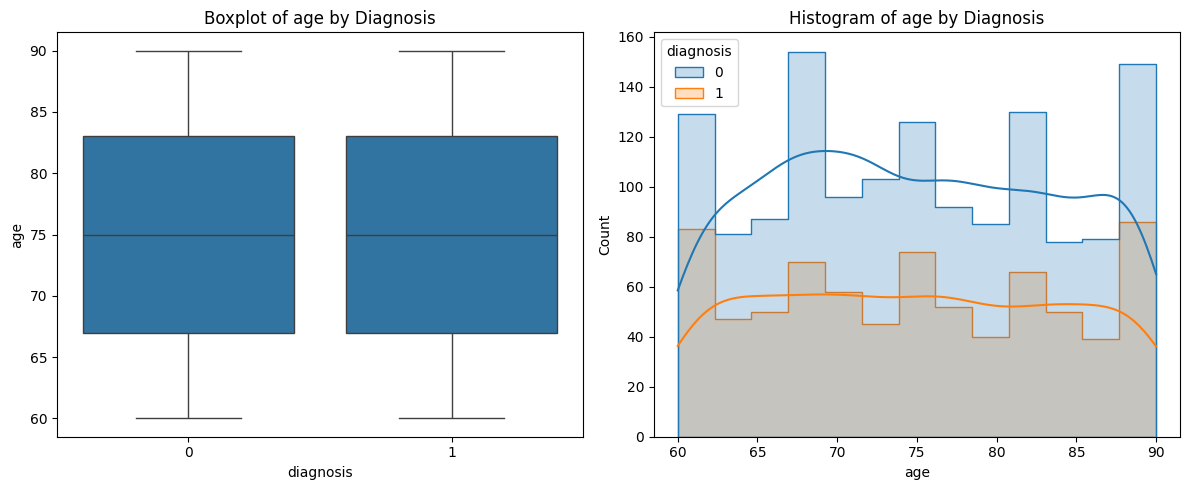

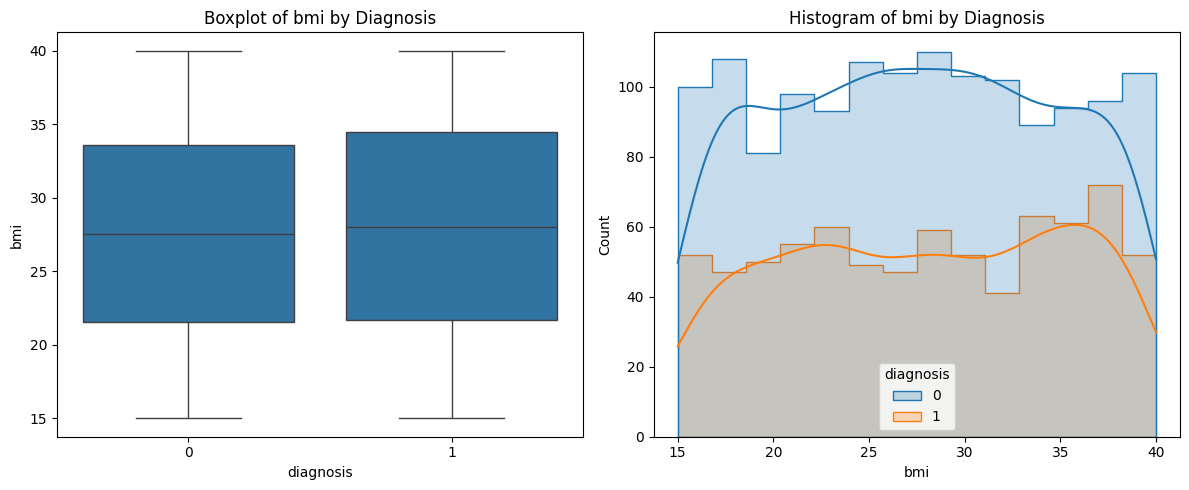

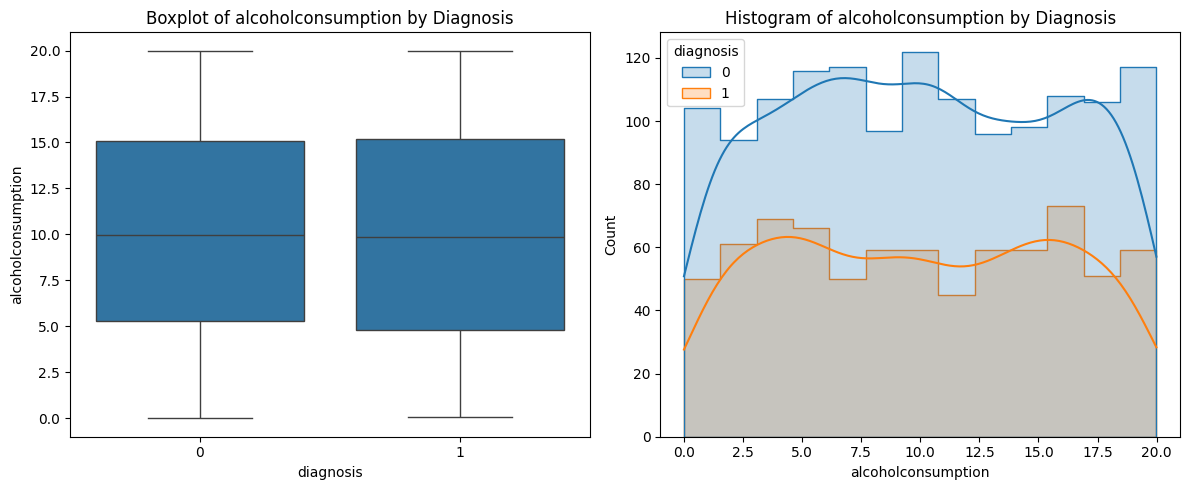

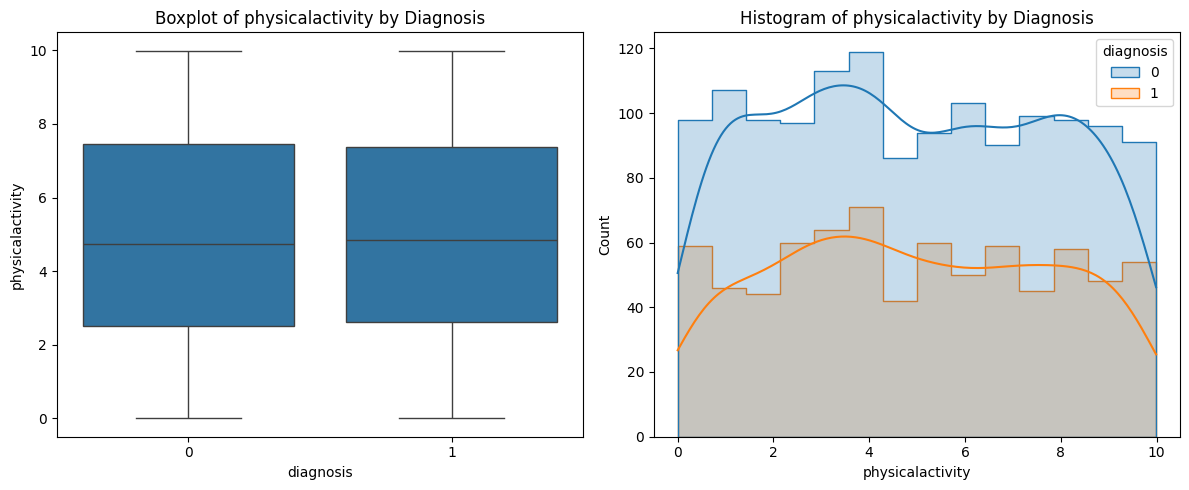

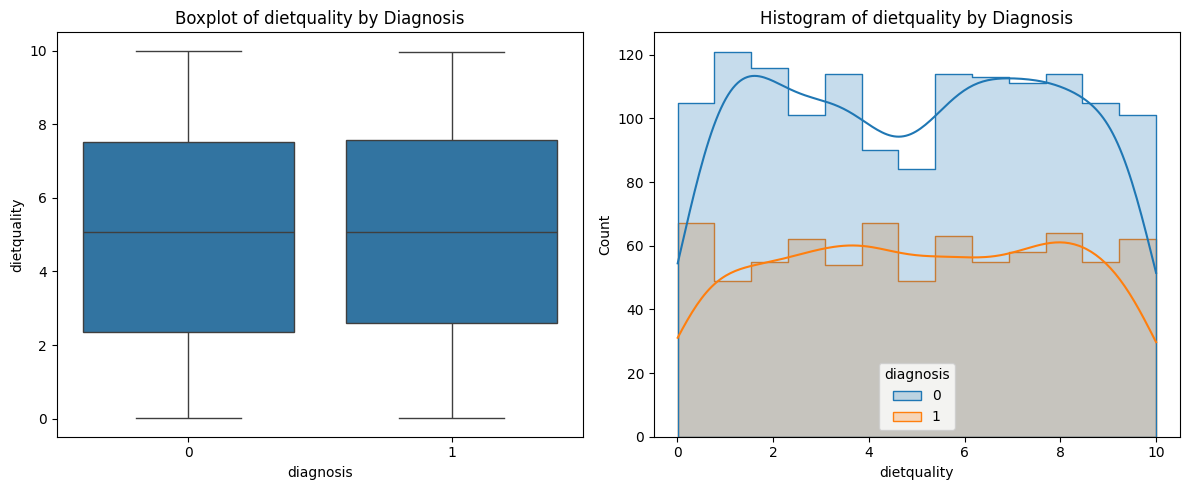

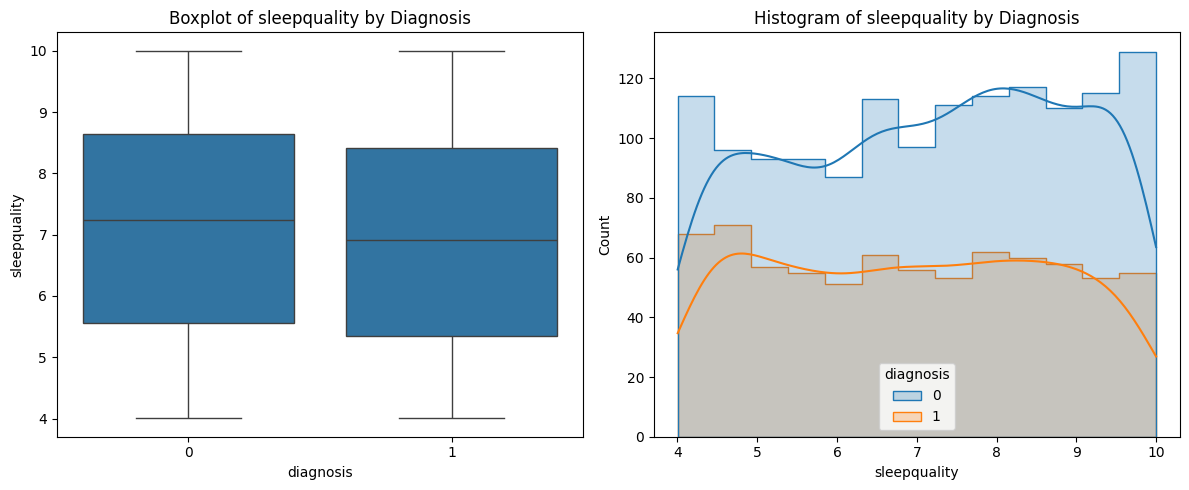

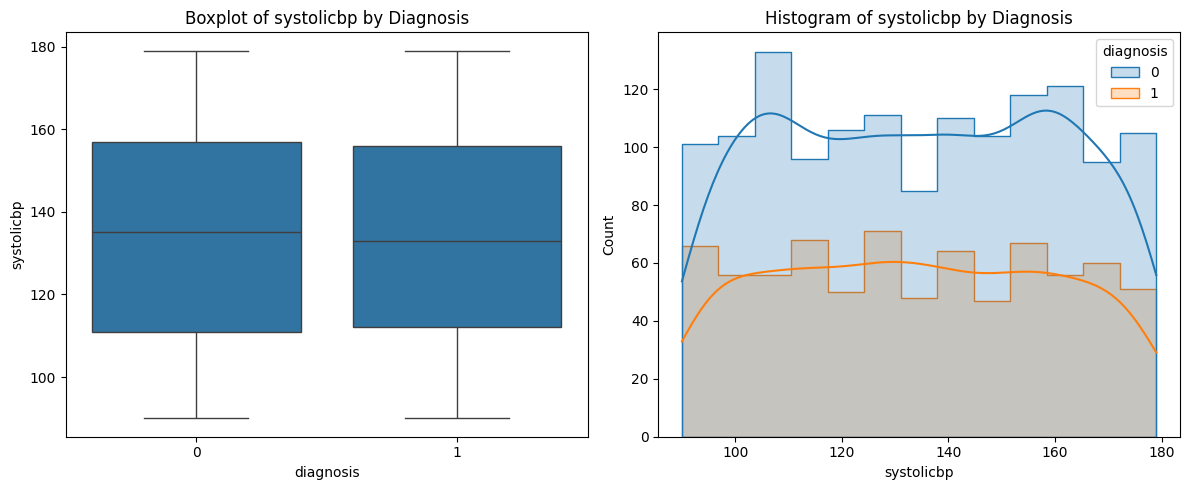

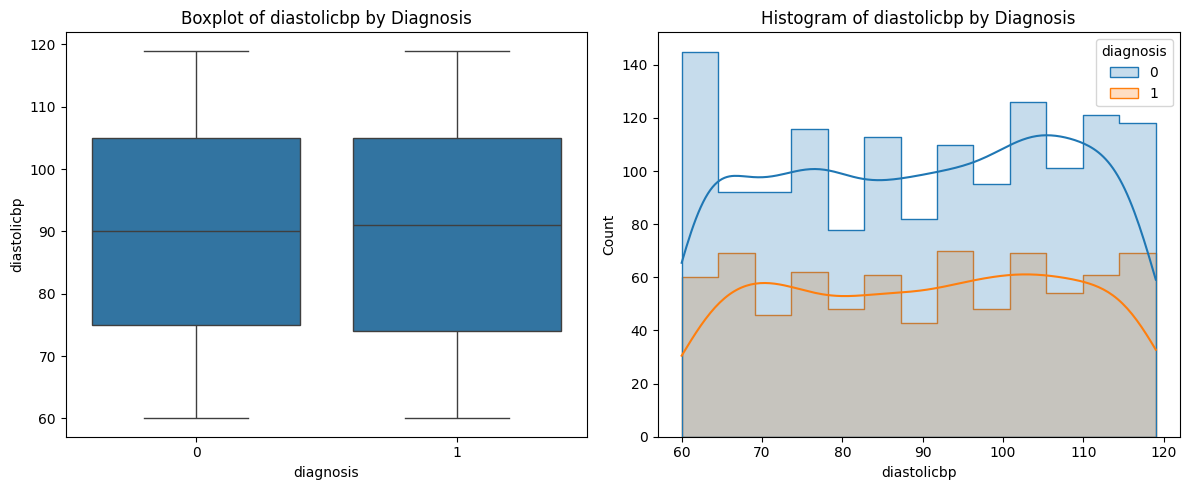

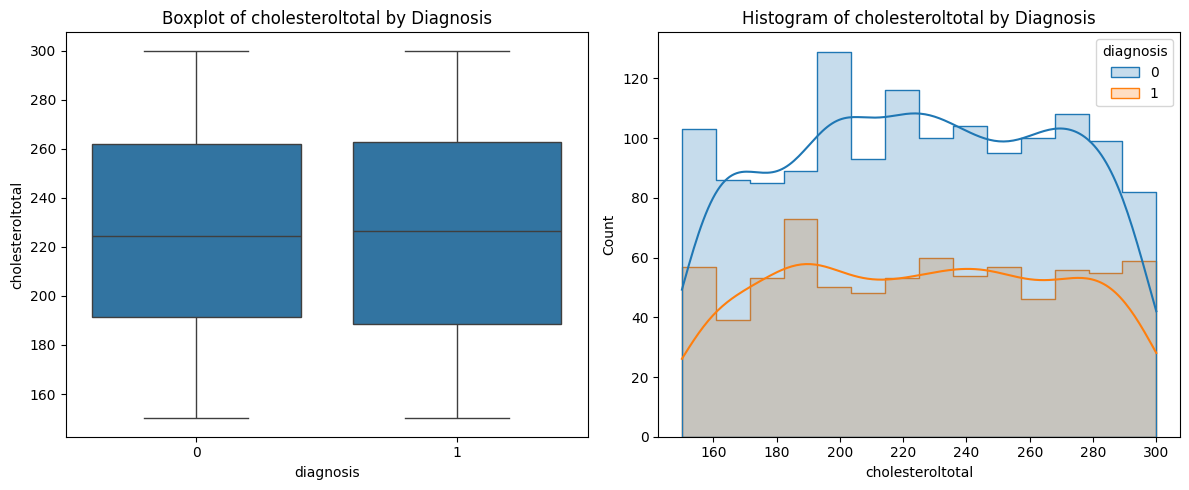

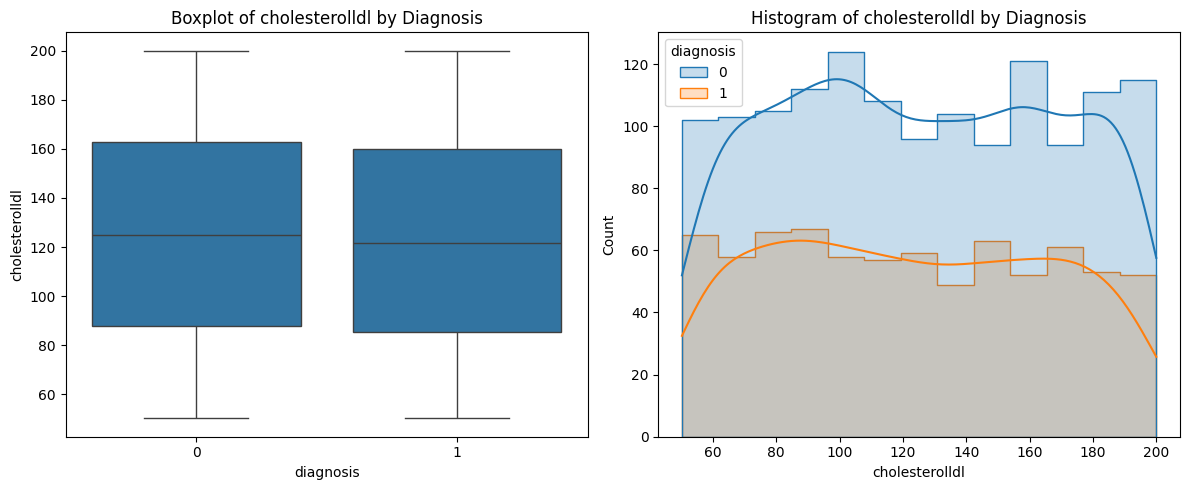

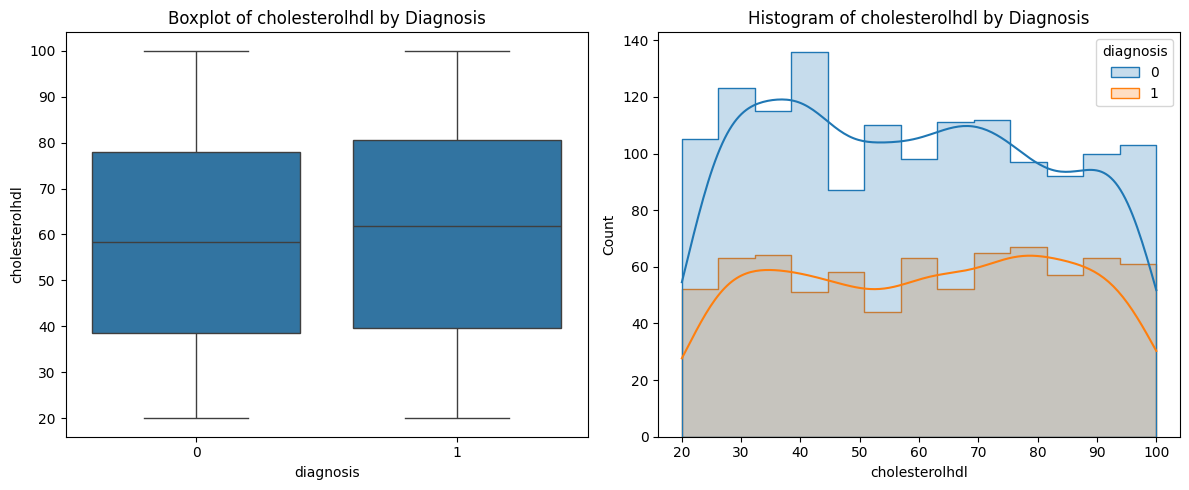

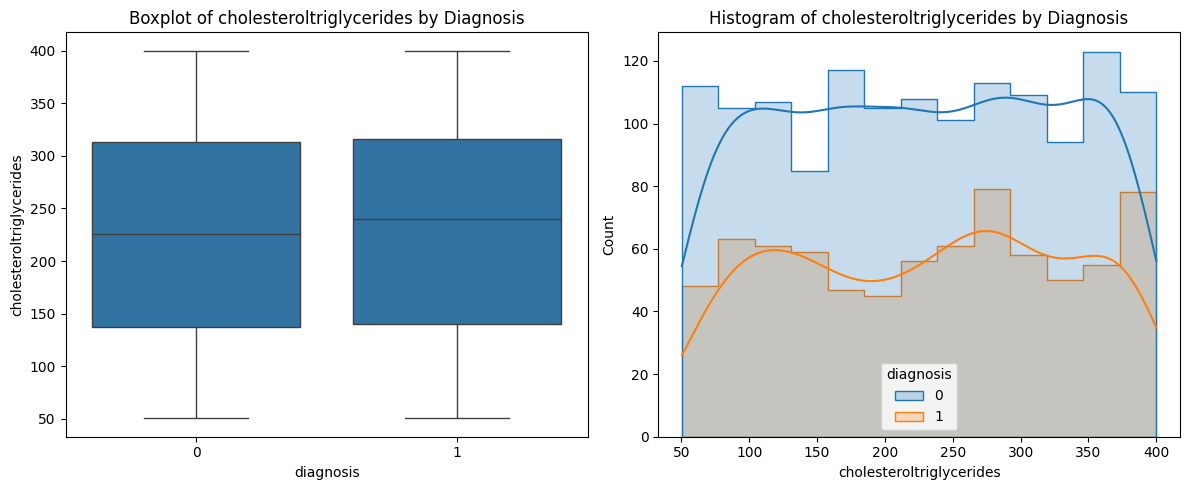

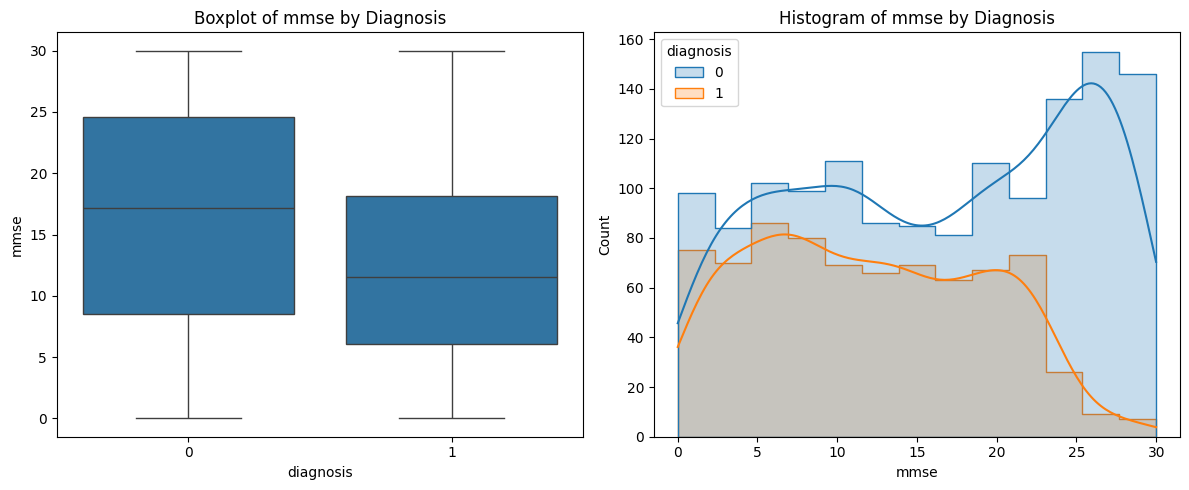

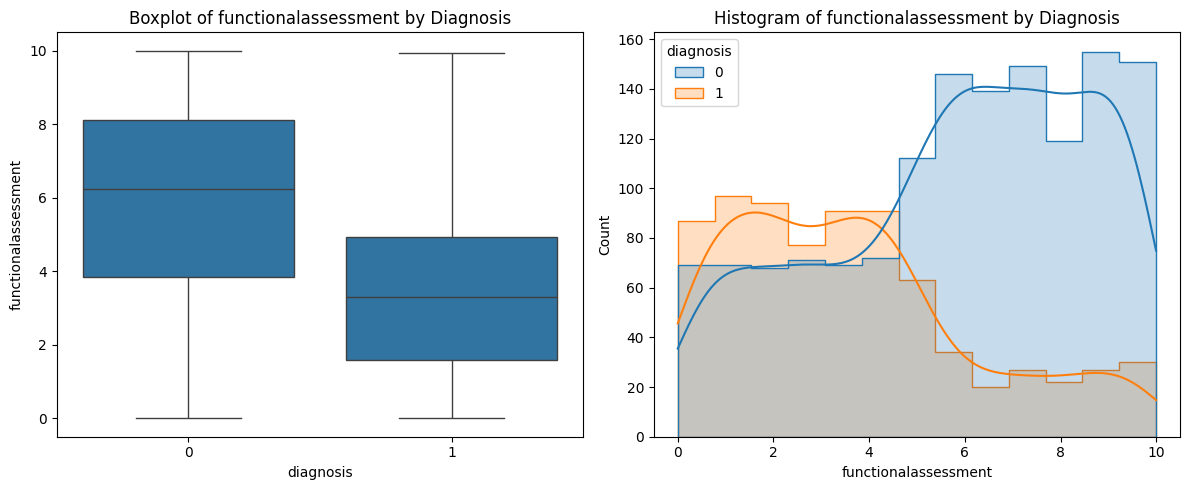

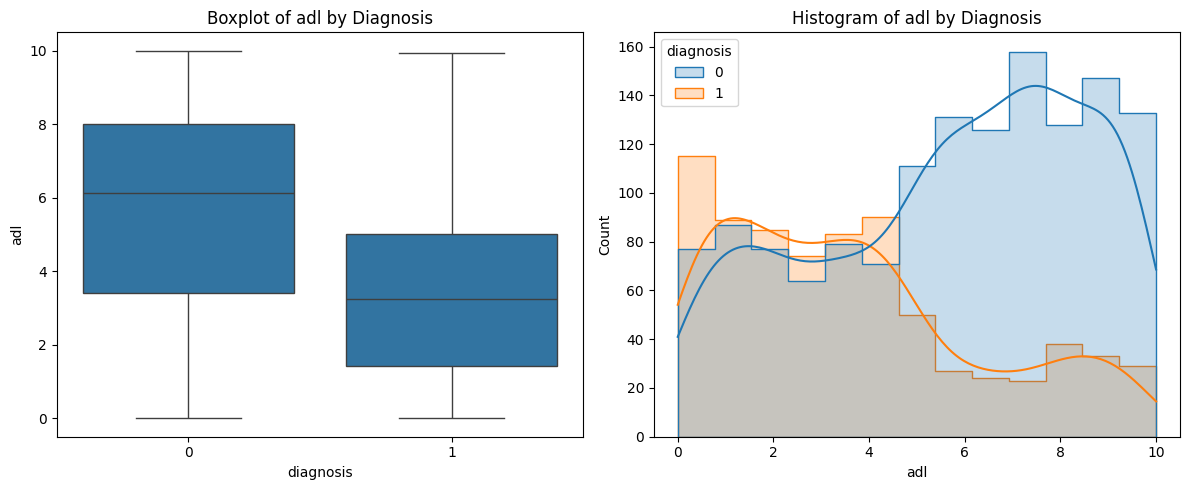

In [9]:
for i, col in enumerate(continuous_features):
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='diagnosis', y=col, data=data)
    plt.title(f'Boxplot of {col} by Diagnosis')
    
    # Histogram/KDE
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, hue='diagnosis', kde=True, element="step")
    plt.title(f'Histogram of {col} by Diagnosis')
    
    plt.tight_layout()
    plt.savefig(f'plots\EDA_plot_cont_{i}_{col}.png')
    plt.show()

### Categorical plots

<>:10: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
<>:10: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
C:\Users\20193583\AppData\Local\Temp\ipykernel_16492\1509259656.py:10: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
  plt.savefig(f'plots\EDA_plot_cat_{i}_{col}.png')


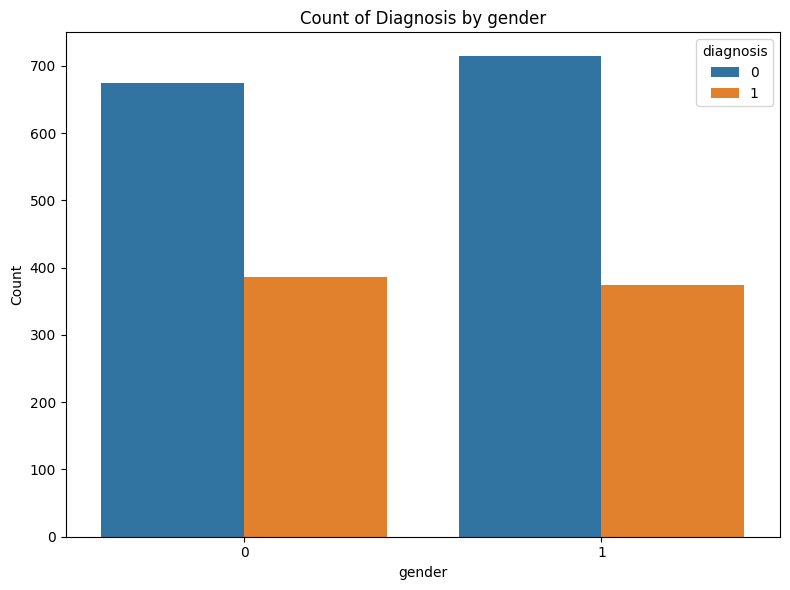

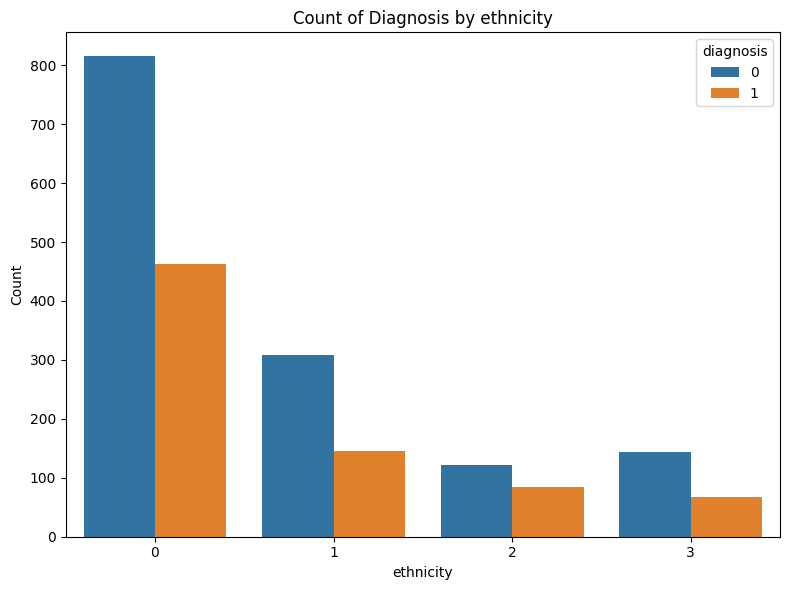

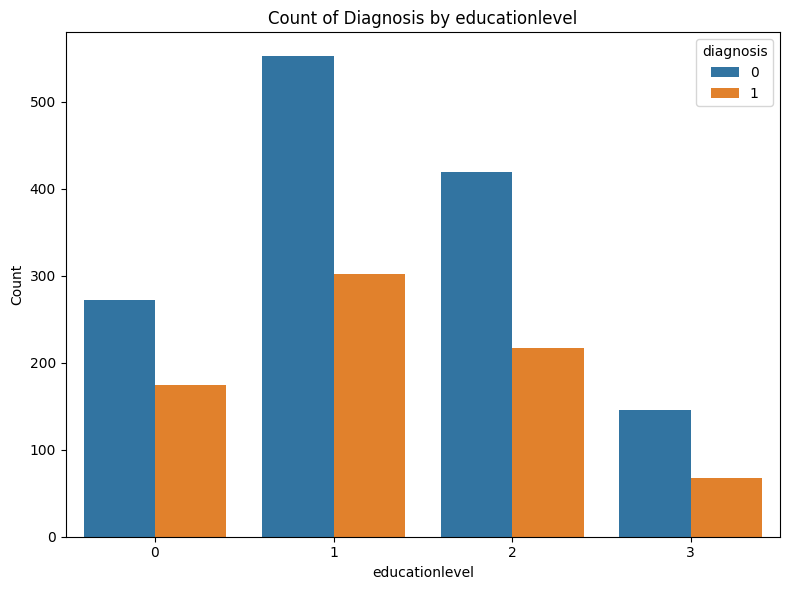

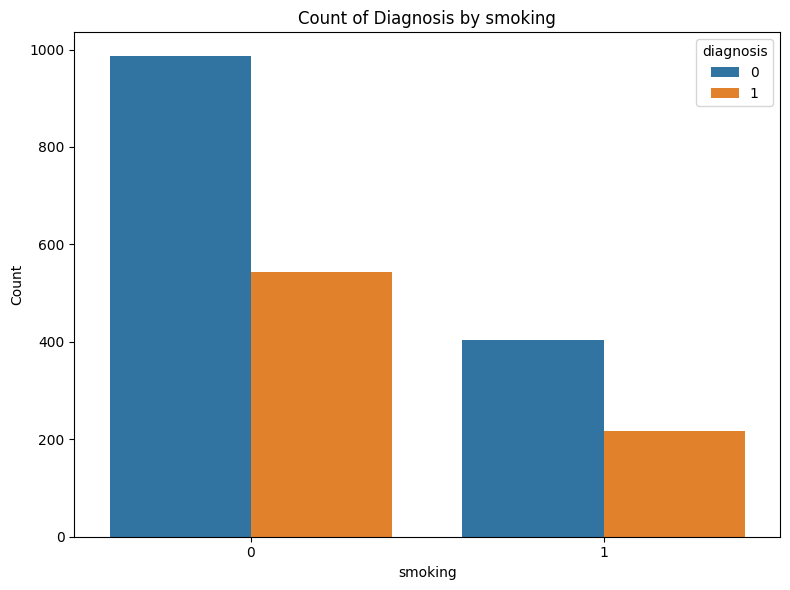

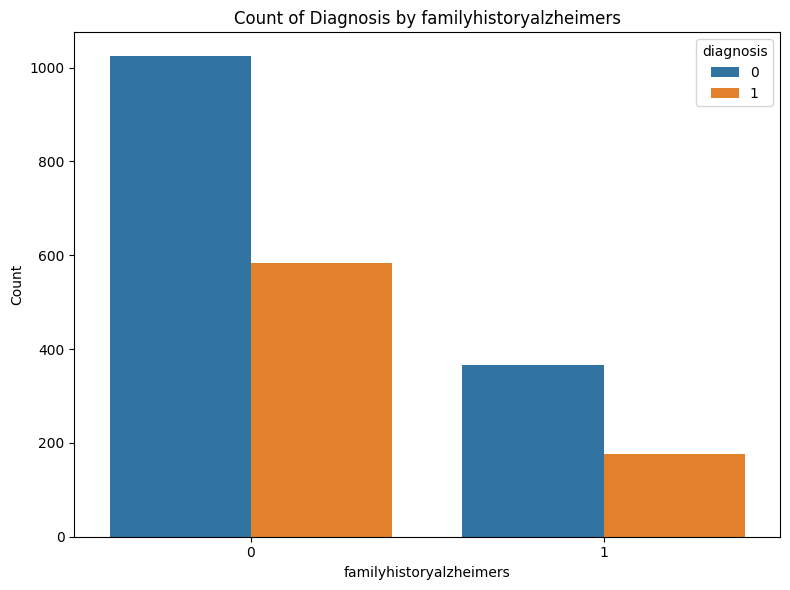

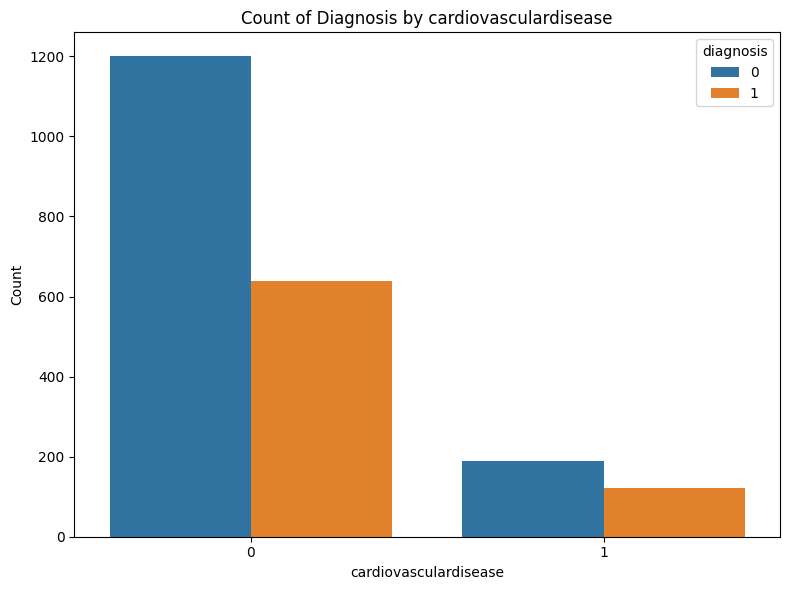

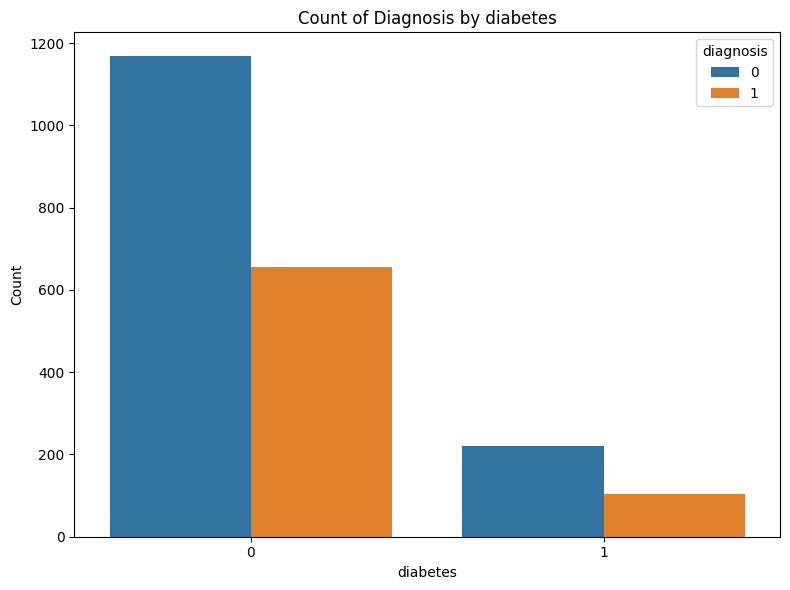

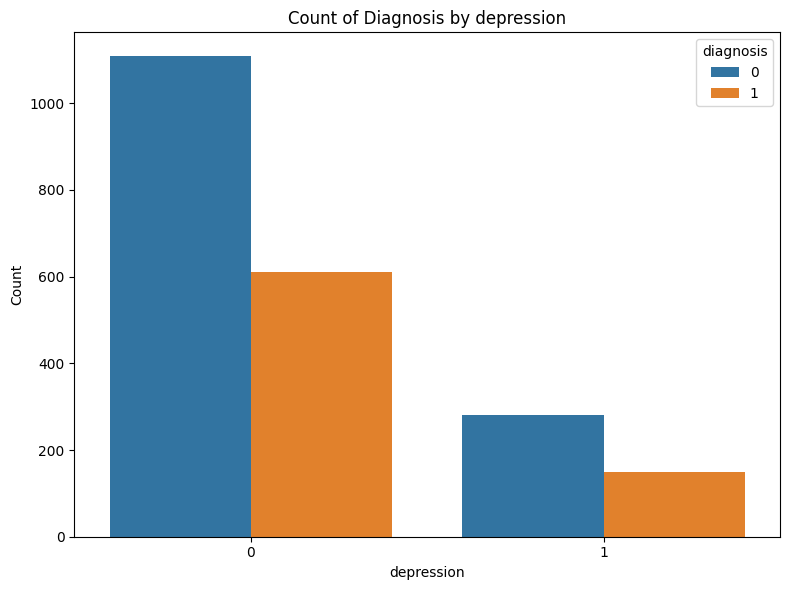

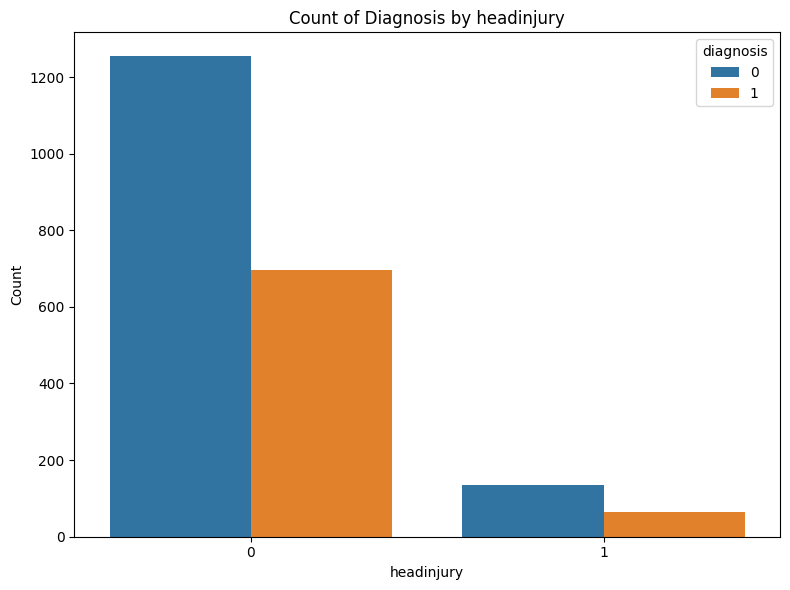

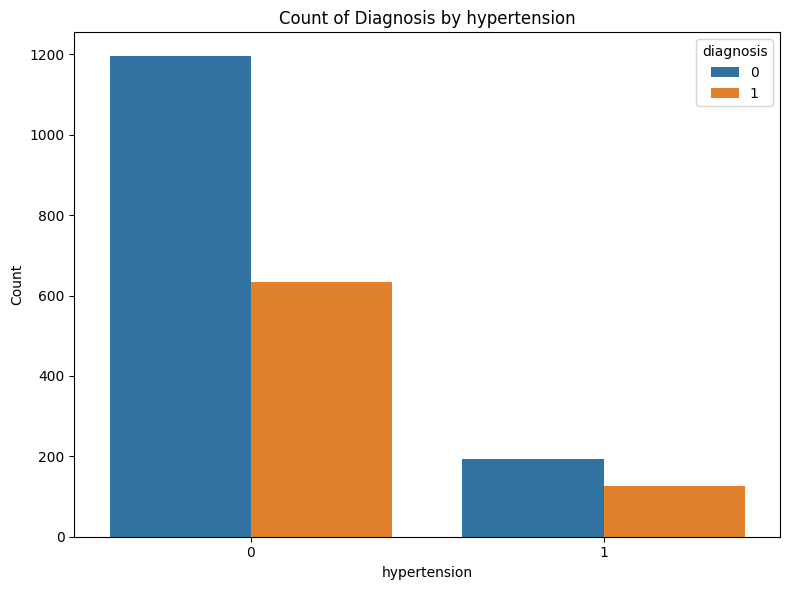

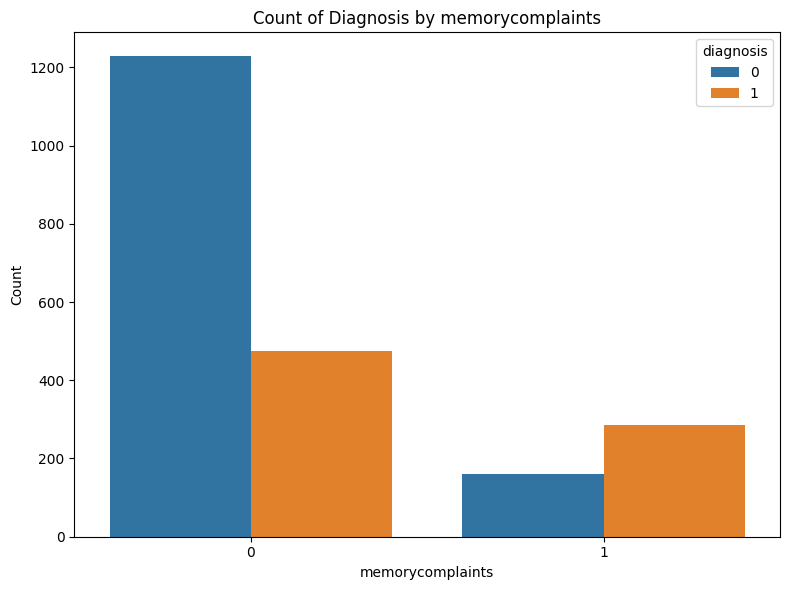

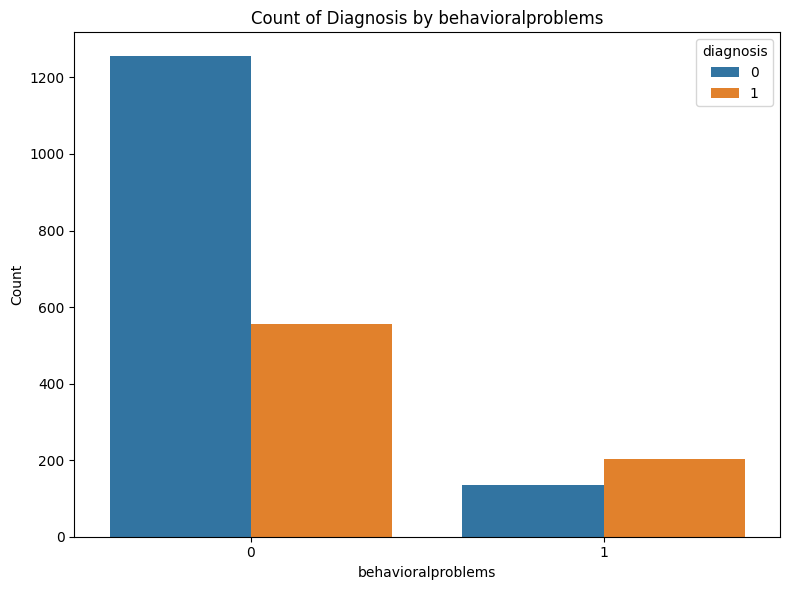

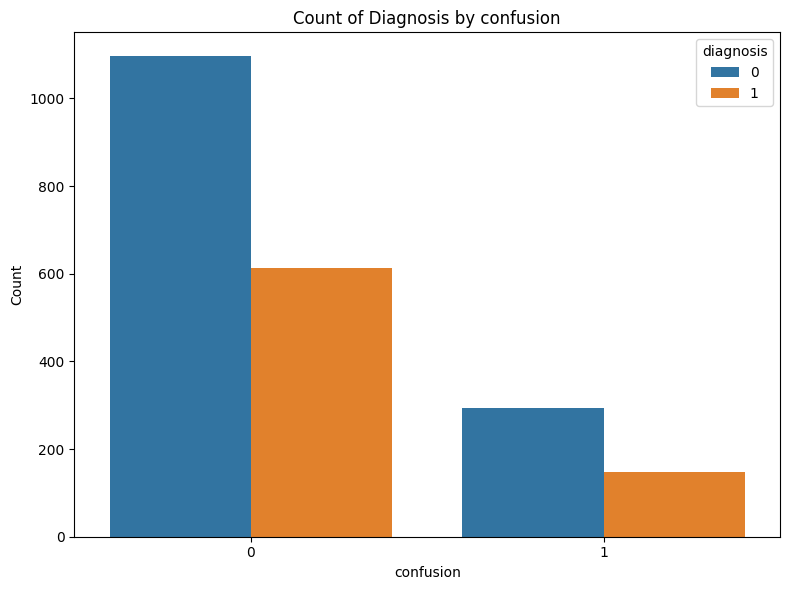

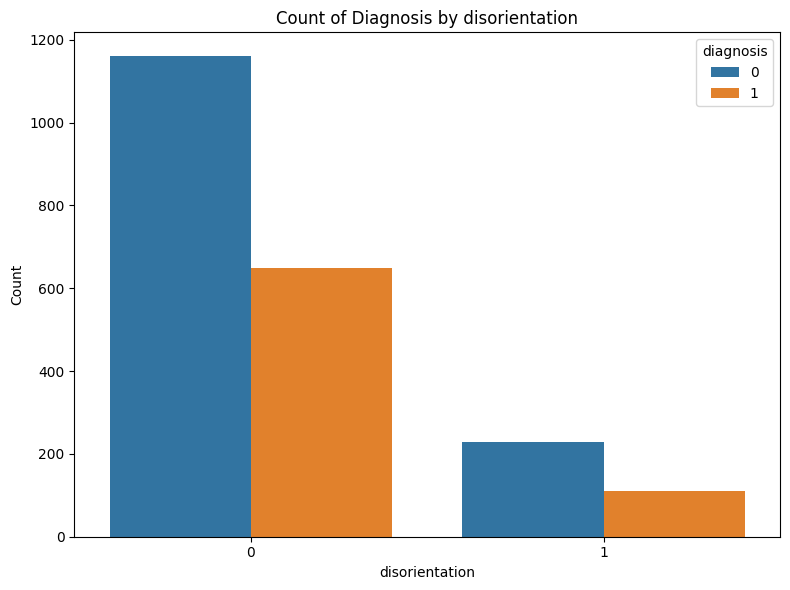

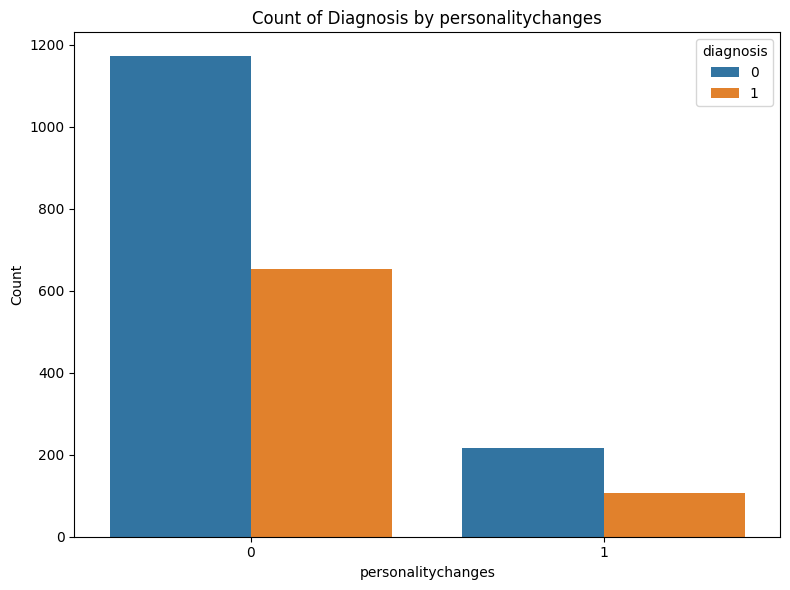

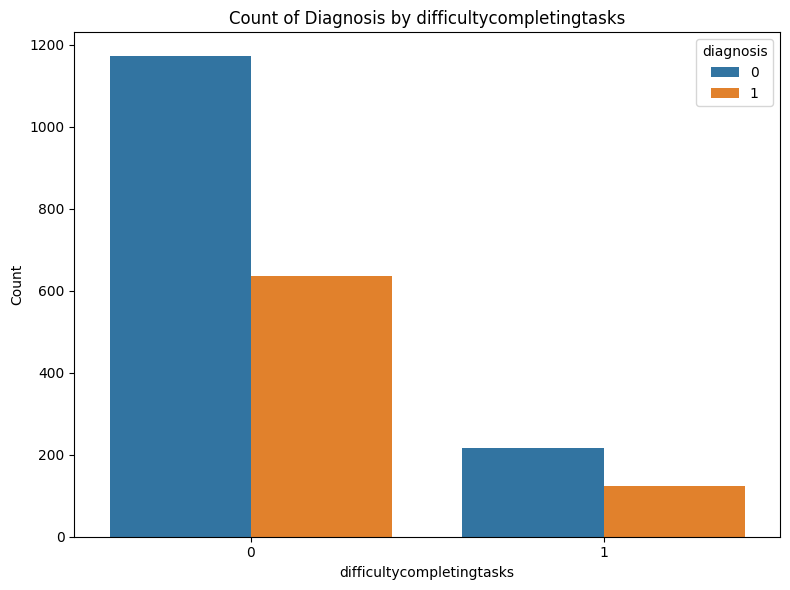

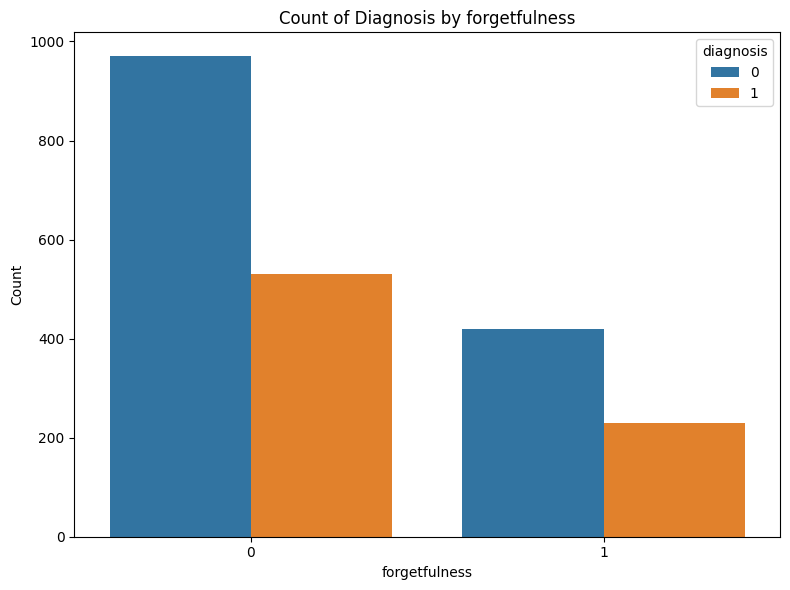

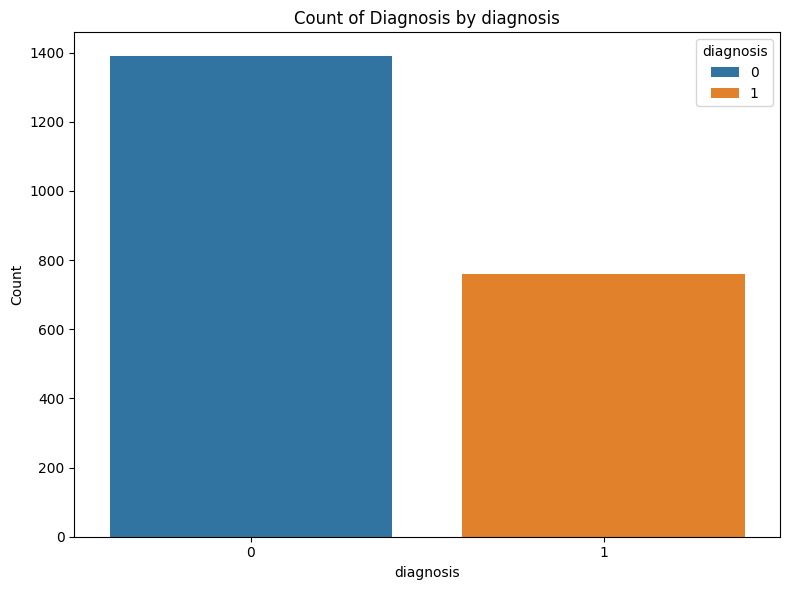

In [10]:
for i, col in enumerate(categorical_features):
    plt.figure(figsize=(8, 6))
    
    # Countplot
    sns.countplot(x=col, hue='diagnosis', data=data)
    plt.title(f'Count of Diagnosis by {col}')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.savefig(f'plots\EDA_plot_cat_{i}_{col}.png')
    plt.show()

### Correlation Heatmap

<>:9: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
<>:9: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
C:\Users\20193583\AppData\Local\Temp\ipykernel_16492\362967799.py:9: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
  plt.savefig('plots\EDA_correlation_heatmap.png')


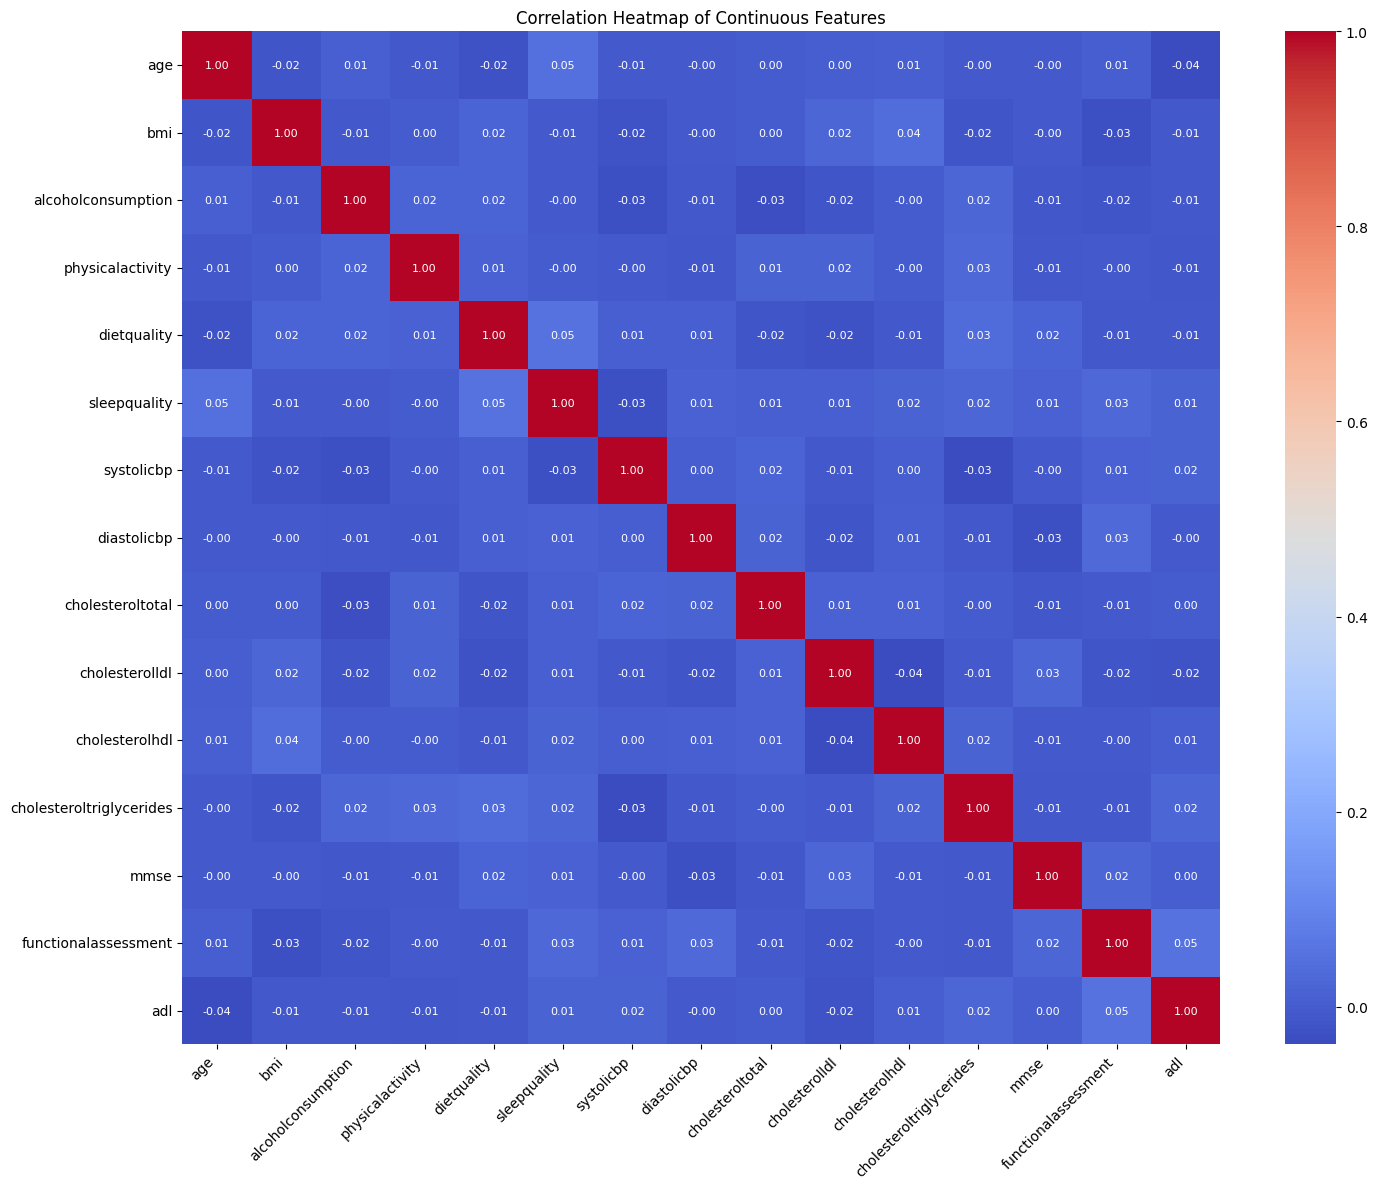

In [11]:
plt.figure(figsize=(15, 12))
corr_matrix = data[continuous_features].corr() 
    
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap of Continuous Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('plots\EDA_correlation_heatmap.png')
plt.show()